# Radar Characteristics of the Martian Polar Caps 
## CMPS 6160 Final Tutorial - Nadim Hashmeh 

__Background:__ Mars has two polar caps that are largely composed of water ice, like Earth. Planetary scientists measure the amount of electromagnetic radiation reflected off the polar cap surface as well as dielectric interfaces in the subsurface using active radar sounding to learn more about its composition and internal structure. The strength of radar reflections is mostly determined by the contrast in dielectric properties between two overlying materials, such as the atmosphere and ice, or ice and rock. Radar reflections at the surface and below are typically represented as bright "reflectors" in cross-sectional images known as radargrams. The data that comprises these radargrams are three dimensional: horizontal position, vertical position, and brightness (relative power of reflection). Using these, scientists can analyze the vertical distribution of dielectric contrasts that are sensitive to the frequency of the radar being used.

__Motivation:__ For my PhD, I am attempting to explain the unexpected behavior of high frequency radar at the south polar cap in order to gain more understanding about its interior structure, distribution of material, and surface texture. High frequency radar behavior (20 MHz) at the south polar cap differs from its northern counterpart, as well as many typical glacier observations on Earth, in that it is often incoherent and rapidly attenuates before reaching the basal interface, if it even reaches the base at all. At lower frequencies (~5 MHz), this behavior is not observed in either polar cap. Therefore, some property of the south polar cap is sensitive to scattering radar at relatively higher frequencies. One way to investigate this is to compare the basal reflector power to the thickness of material above it. One would expect a negative correlation between these two variables, and in my own work, I have observed it in some areas. However, there are many unexpected instances where it does not follow the same trend. My broader research goals aim to explain this behavior, and one avenue I have considered is looking at the role of surface slope in influencing the propagation of radar through the south polar ice.

__Data:__ I have surface and basal reflector information for both south and north polar caps. SHAllow RADar (SHARAD) radargrams are available in NASA's Planetary Data System archive, which I used to extract the reflector position and power information from using a variety of tools during my own research. This compiled dataset contains the orbit number, reflector identifier, vertical pixel position, surface elevation (south pole only), raw radar power, latitude, longitude, and spatial categorical information of pairs of surface and basal reflectors (south pole only). There are over 47,000 observations for the south polar dataset, and over 9,000 observation for the north polar dataset.

__Plan and question(s) to be answered:__ I will use Python to calculate the slope of each surface reflector I have mapped and compare that information to ice thickness and reflector power values to see if surface slope shows any correlation across these variables. Basically, do steeper surfaces affect the detection of the base in any notable way? I will also explore relationships between these values and the spatial categorical data they contain to note the regional distribution of my observations. I will also look at the spatial distribution of this behavior in the context of named geologic regions to determine if it a particular characteristic is regionally unique. Lastly, I will compare the analysis of the south polar cap to a smaller, similar dataset from the north polar cap. Specifically, I'll look at differences in basal reflector power, the effect of slope on reflector power, and surface to base attenuation through ice thickness between both polar caps. 

### Project website (this page):
https://nhashmeh.github.io

### Project repository: 
https://github.com/nhashmeh/nhashmeh.github.io

### Project data: 
https://github.com/nhashmeh/nhashmeh.github.io/blob/main/spld_data_6160project.csv

#### Raw SHARAD data: 
https://pds-geosciences.wustl.edu/missions/mro/sharad.htm

#### SHARAD instrument documentation: 
Seu, R., Phillips, R. J., Biccari, D., Orosei, R., Masdea, A., Picardi, G., Safaeinili, A., Campbell, B. A., Plaut, J. J., Marinangeli, L., Smrekar, S. E., & Nunes, D. C. (2007). SHARAD sounding radar on the Mars Reconnaissance Orbiter. Journal of Geophysical Research, 112(E5), E05S05. https://doi.org/10.1029/2006JE002745 (PDF: **INSERT LINK**)

#### Background reading:
Byrne, S. (2009). The Polar Deposits of Mars. Annual Review of Earth and Planetary Sciences, 37(1), 535–560. https://doi.org/10.1146/annurev.earth.031208.100101 (PDF: **INSERT LINK**)


In [538]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 5]

In [645]:
# load in data

all_data_spld = pd.read_csv('spld_data_6160project.csv',header=0)
all_data_spld.head()

,orbit_num,segment_id,br_loc,surf_loc,br_power_raw,surf_power_raw,lat,lon,surf_elevation,region,lrz,fog
0,37201,0,1619,1458,0.000362,0.216509,-75.3896,180.1296,1901.906494,UL,yes,yes
1,37201,0,1616,1457,0.000320,0.229403,-75.3970,180.1237,1903.368896,UL,yes,yes
2,37201,0,1617,1457,0.000273,0.217162,-75.4043,180.1178,1905.088501,UL,yes,yes
3,37201,0,1616,1457,0.000353,0.156191,-75.4128,180.1109,1907.261230,UL,yes,yes
4,37201,0,1613,1457,0.000317,0.193375,-75.4202,180.1049,1908.500610,UL,yes,yes


In [647]:
# load in data

all_data_npld = pd.read_csv('npld_data_6160project.csv',header=0)
all_data_npld.head()

,orbit_num,segment_id,y-pixel (BR),y-pixel (surface),br_power_raw,surf_power_raw,latitude,longitude
0,2022,0,2599,2476,0.000456,0.040354,83.2071,295.6983
1,2022,0,2600,2475,0.001833,0.033862,83.2138,295.6738
2,2022,0,2599,2475,0.002085,0.033944,83.2215,295.6452
3,2022,0,2599,2475,0.000497,0.044278,83.2359,295.5921
4,2022,0,2598,2475,0.000442,0.030495,83.2425,295.5676


### Data description and origin:

Each observation contains information about a pair of basal and surface reflector pixels within the same column of a given radargram. Refer to the radargram example in the next section for a better idea of what the columns represent.

__orbit_num:__ The orbit number of the Mars Reconnaissance Orbiter at the time this data was captured. It is also the track number of the radargram produced from this orbital observation.

__segment_id__: The segment id is unique for a given reflector segment pair. Usually, multiple pixel pairs are measured from a given radargram. Adjacent pixels represent a single continuous reflector segment, identified by their segment identification number (segment_id). Multiple pixel segments are common across a single radargram, which is why they require an identification number to distinguish themselves from each other.

__br_loc:__ Basal reflector location. This is the y-coordinate location of the basal reflector pixel mapped in a given radargram. This value increases going down a column of radargram pixels, as opposed to typical cartesian coordinates where the opposite is true.

__surf_loc:__ Surface reflector location. This is the location of the surface reflector pixel directly above the basal reflector pixel (br_loc). Same description as br_loc.

__br_raw_power:__ Dimensionless radar power value of the basal reflector. The strength of the radar reflection off the basal interface of the south polar cap is assigned a magnitude once it reaches the spacecraft. These values tend to have a large range, with low numbers representing weak returns and vice versa. Because of this, it is useful to convert this value to decibels to facilitate easier comparisons between different radar observations.

__surf_raw_power:__ Dimensionless radar power value of the surface reflector. This is the power of the surface reflector pixel directly above the basal reflector pixel (br_raw_power). Same description as br_raw_power.

__lat__: Latitude of the basal and surface reflector pixel pair. Each column of pixels in a radargram has an associated latitude and longitude that comes from the geometry file associated with each radargram produced by the SHARAD instrument team. Units are in degrees.

__lon__: Longitude of the basal and surface reflector pixel pair. Same description as lat. Units are in degrees.

__surf_elevation__: South pole only. Real surface elevation of the surface reflector pixel measured in a radargram. Units are in meters. This value does not come from the radar data. I extracted elevation data coincident with my radar reflector observations using the Mars Orbiter Laser Altimeter (MOLA) dataset in a GIS software. These values were appended to this dataset afterwards. 

__region__: South pole only. Acronym for named region for where the observation is located. These names come from the literature and do not have distinct boundaries but are instead used to describe broad regions in geological analyses. For the purposes of this project, I have drawn the boundaries myself according to what I know to be true in the literature. AL = Australe Lingula; AS = Australe Scopuli; PL = Promethei Lingula; SP = Sisyphi Planum; UL = Ultima Lingula.

__lrz__: South pole only. Low Reflectivity Zone. The yes/no refers to the presence of a low reflectivity zone (LRZ) between the surface and basal reflectors. LRZ are a distinct radar facies observed in SHARAD data at the south polar cap. As the name implies, LRZs are relatively thick regions free of (or contain very few) reflectors. They are of interest due to their seemingly continuous composition. Though the south polar cap is almost entirely water ice by volume (with a ~10% bulk fraction of dust), massive LRZ deposits found near the pole have recently been confirmed to be carbon dioxide ice. This has implications for the climatological history of Mars, and suggests further investigation into the compositions of other LRZ in the SPLD is necessary.

__fog__: South pole only. The incoherent behavior of the radar signal at the south polar cap often manifests as a widespread cloud of gray starting beneath the surface reflector in radargrams and extending well into the volume, obscuring any potential radar stratigraphy. This effect is thought to be related to surface and/or volumetric scattering, and resembles a fog-like appearance, hence the name. Like LRZ, this phenomenon is of interest due to its implications for polar cap composition and history, particularly when compared to the fog-less northern polar cap.

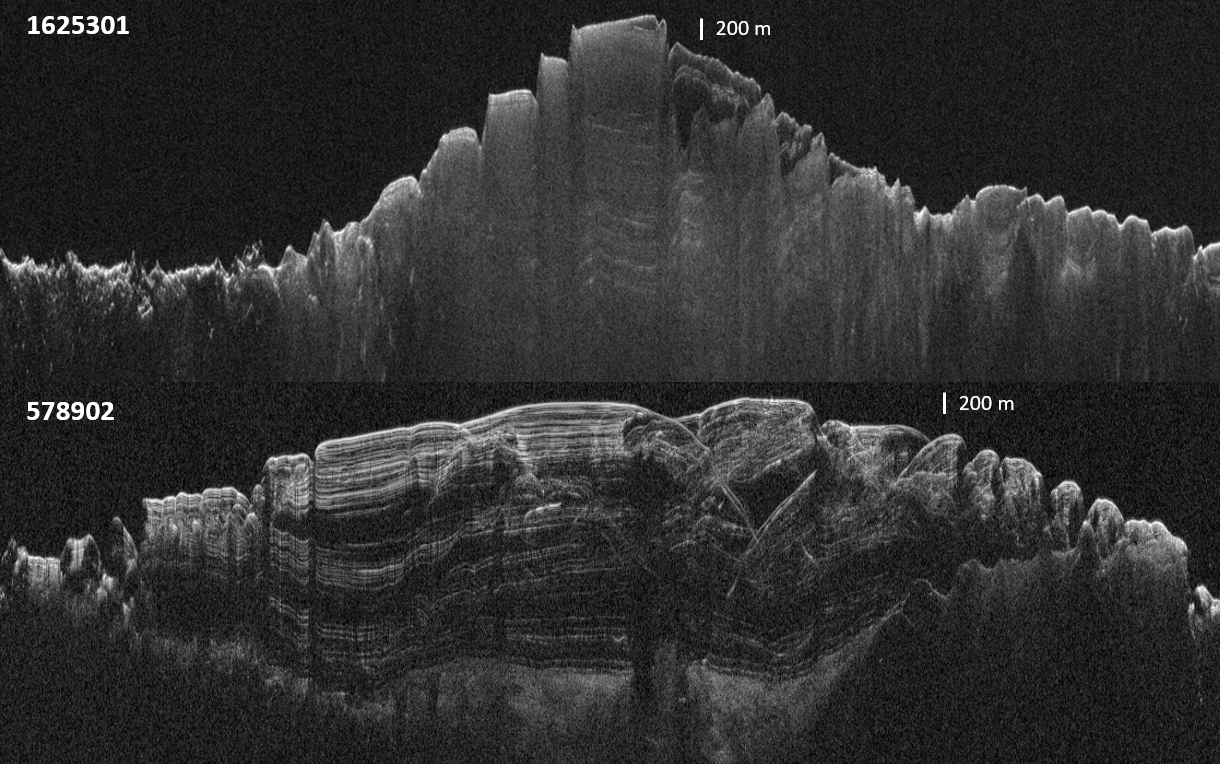

Typical SHARAD radargrams of the south (top) and north (bottom) polar caps. In the south, note the fog-like scatter effect, scarcity of clear internal reflectors, and the large carbon dioxide ice deposits near the surface at its highest points. Compare that to the relatively coherent and stratigraphically dense north polar cap radargram.

In [651]:
# Things to do:

# Convert raw powers to dB
# Calculate thicknesses
# Calculate slopes

# Summary statistics
# EDA: plots of the data, look for relationships to explore with models/stats
# Come up with two models/stats pursuits: statistical significance? correlations? predictions?


## Additional ETL...
### Convert power to decibels

A few calculations are necessary before I can analyze the data. First, the raw power values reported are technically considered "arbitrary" (therefore unitless) and can vary in several orders of magnitude. In order to better understand relative differences in power, the convention is to convert these raw values to decibels (dB) using the following equation, where R is the original power value, and P is the converted dB power value:

### <center>$ P = 10 \cdot \log{_1}{_0}{R} $</center>

With this dataset, this conversion often results in "negative" dB values. The sign of the value has no meaning, only the absolute difference between the numbers is important.

In [652]:
all_data_spld['br_power_db'] = 10 * np.log10(all_data_spld['br_power_raw'])
all_data_spld['surf_power_db'] = 10 * np.log10(all_data_spld['surf_power_raw'])
all_data_npld['br_power_db'] = 10 * np.log10(all_data_npld['br_power_raw'])
all_data_npld['surf_power_db'] = 10 * np.log10(all_data_npld['surf_power_raw'])

In order to have some idea of the power loss between the surface and the base of the polar cap, it is useful to calculate the difference between the two. I subtract the basal power from the surface power assuming that the basal power is lower than that at the surface. The resulting number should be positive. I am not taking any absolute values here, so a negative result is technically a possibility if my assumption does not hold (which has implications for other processes occuring). If these come up, I will not consider them during my analysis.

In [653]:
#all_data_spld['relative_power_db'] = (-1 * (all_data_spld['surf_power_db'] - all_data_spld['br_power_db']) )
#all_data_npld['relative_power_db'] = (-1 * (all_data_npld['surf_power_db'] - all_data_npld['br_power_db']) )

all_data_spld['power_loss_db'] = ( (all_data_spld['surf_power_db'] - all_data_spld['br_power_db']) )
all_data_spld = all_data_spld[all_data_spld['power_loss_db'] > 0]
all_data_npld['power_loss_db'] = ( (all_data_npld['surf_power_db'] - all_data_npld['br_power_db']) )
all_data_npld = all_data_npld[all_data_npld['power_loss_db'] > 0]


### Calculate polar cap thickness

A crucial piece of context needed for analyzing radar signal attenuation through some material is the distance between the points where measurements are being made. In this case, I have data for the surface and base of the polar caps. Therefore, I can calculate the thickness of the material in between. However, since radar is measuring the delay in the return time of the signal from a reflective interface, the y-axis is actually a measure of time and must be converted to distance. This requires knowledge about the material in between two measurements.

The dielectric constant (also known as relative permittivity) is a measure of how electrically permeable a material is relative to a vacuum. For relatively pure water ice on Mars, I'll assume a value of 3.15 (Johari, 1976). I can use this number and a slightly modified version of the relationship between distance, rate, and time, to calculate thickness (in this case, distance):

## <center>$ d = \frac {d{_p}{_x} t{_p}{_x} c}  {2 \sqrt{\epsilon{_r}^{'}}}. $</center>

$d{_p}{_x}$ is the number of pixels between the surface and basal reflectors, $t{_p}{_x}$ is the per pixel time in vertical space (0.0375 microseconds), $c$ is the speed of light, and $\epsilon{_r}^{'}$ is the dielectric constant. The 2 comes from the two way travel time of the radar signal.

In [654]:
tpx = 0.0375/(10**6) # seconds
dc = 3.15
c = 3e8 # meters/seconds

# South polar cap

dpx = (3600-all_data_spld['surf_loc']) - (3600-all_data_spld['br_loc'])

d = (dpx*tpx*c)/(2*np.sqrt(dc)) # thickness in meters
all_data_spld['thickness'] = d
all_data_spld['thickness']

0        510.261881
1        503.923224
2        507.092553
3        503.923224
4        494.415239
            ...    
47613    434.197998
47614    427.859341
47615    427.859341
47616    424.690013
47617    431.028670
Name: thickness, Length: 47618, dtype: float64

In [655]:
# North polar cap

dpx = (3600-all_data_npld['y-pixel (surface)']) - (3600-all_data_npld['y-pixel (BR)'])

d = (dpx*tpx*c)/(2*np.sqrt(dc)) # thickness in meters
all_data_npld['thickness'] = d
all_data_npld['thickness']

0        389.827400
1        396.166057
2        392.996728
3        392.996728
4        389.827400
           ...     
9232    1435.705790
9233    1435.705790
9234    1429.367133
9235    1416.689819
9236    1410.351163
Name: thickness, Length: 9031, dtype: float64

### Calculate slope

There are several ways to calculate slope for a landscape. I am interested in seeing the changes in radar behavior between points along a given reflector (observations in our dataframes), which means I should calculate the slope at this scale. In order to do this, I will use the segment_id column to identify each point that make up a given reflector segment, and then I will need to determine the distance between each point to divide by their elevation differences. It is easy to assume a uniform distance between each point, but this data underwent processing before reaching its current state, so I am opting to calculate distance based on the latitude and longitude values I have which are projected on a sphere with a radius equivalent to the planet. This can be done using the Haversine formula. 

In [656]:
from math import radians, cos, sin, asin, sqrt, atan, degrees, atan2

def hav_dist(lat1, lon1, lat2, lon2):

      R = 3390 # radius of Mars in km 

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c # returns the distance in km

Now that I have a formula to calculate distance, I can calculate slope. To do this, I first establish a stopping point for each segment to avoid calculating slopes between the end point of one segment and the start point of a completely different segment. Then, I define the start and end points for the slope calculation using latitude and longitude information, input this into the hav_dist function, and divide the difference in elevations by this result (rise/run). The resulting slope value is then converted into degrees.

I can only do this slope analysis for the south polar cap because I do not have elevation data for the north.

In [657]:
surf_elevation = all_data_spld["surf_elevation"]/1000 #in km

slopes = np.zeros(len(surf_elevation)) #store slopes
hav_distances = np.zeros(len(surf_elevation)) #store distances

for i in range(0,len(surf_elevation)-1):
    
    if all_data_spld["segment_id"][i] != all_data_spld["segment_id"][i+1]: #stopping point for segment
        continue
    
    lat1 = all_data_spld["lat"][i] # y1 latitude
    lat2 = all_data_spld["lat"][i+1] # y2 latitude
    
    lon1 = all_data_spld["lon"][i] # y1 longitude
    lon2 = all_data_spld["lon"][i+1] # y2 longitude

    #distances in meters
    hav_distances[i] = hav_dist(lat1,lon1,lat2,lon2) * 1000
    
    #slope in degrees
    slopes[i] =  degrees(atan( (surf_elevation[i+1] - surf_elevation[i]) / (hav_dist(lat1,lon1,lat2,lon2)) ))

In [658]:
all_data_spld['slopes (deg)'] = abs(slopes) # report all slopes in positive degrees
all_data_spld['slopes (deg)'] # each observation will have slope calculated between itself and the next observation

0        0.187617
1        0.223522
2        0.242512
3        0.158910
4        0.021708
           ...   
47613    1.060939
47614    0.795616
47615    0.601391
47616    0.599310
47617    0.000000
Name: slopes (deg), Length: 47618, dtype: float64

### Clean up dataframes

I have all of the data needed to conduct analyses, so I'll trim and clean up both dataframes to only include what is necessary.

In [659]:
all_data_npld = all_data_npld[['orbit_num', 'segment_id', 'br_power_db', 'surf_power_db','power_loss_db','thickness','  latitude',' longitude']]
all_data_npld = all_data_npld.rename(columns={'  latitude': 'lat', ' longitude': 'lon'})

all_data_spld = all_data_spld[['orbit_num', 'segment_id', 'br_power_db', 'surf_power_db','power_loss_db','thickness','lat','lon','surf_elevation','slopes (deg)','region','lrz','fog']]

In [660]:
all_data_spld

,orbit_num,segment_id,br_power_db,surf_power_db,power_loss_db,thickness,lat,lon,surf_elevation,slopes (deg),region,lrz,fog
0,37201,0,-34.410192,-6.645240,27.764951,510.261881,-75.3896,180.1296,1901.906494,0.187617,UL,yes,yes
1,37201,0,-34.949491,-6.394009,28.555482,503.923224,-75.3970,180.1237,1903.368896,0.223522,UL,yes,yes
2,37201,0,-35.645968,-6.632162,29.013807,507.092553,-75.4043,180.1178,1905.088501,0.242512,UL,yes,yes
3,37201,0,-34.518256,-8.063440,26.454816,503.923224,-75.4128,180.1109,1907.261230,0.158910,UL,yes,yes
4,37201,0,-34.989024,-7.135997,27.853027,494.415239,-75.4202,180.1049,1908.500610,0.021708,UL,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47613,8146,982,-36.075458,-22.912512,13.162946,434.197998,-73.9999,179.3369,2040.122192,1.060939,UL,yes,no
47614,8146,982,-33.250994,-27.282652,5.968341,427.859341,-73.9913,179.3309,2049.718018,0.795616,UL,yes,no
47615,8146,982,-36.123611,-24.517298,11.606313,427.859341,-73.9840,179.3258,2055.826416,0.601391,UL,yes,no
47616,8146,982,-32.482645,-24.788737,7.693908,424.690013,-73.9766,179.3206,2060.507813,0.599310,UL,yes,no


In [661]:
all_data_npld

,orbit_num,segment_id,br_power_db,surf_power_db,power_loss_db,thickness,lat,lon
0,2022,0,-33.407219,-13.941113,19.466107,389.827400,83.2071,295.6983
1,2022,0,-27.369394,-14.702810,12.666584,396.166057,83.2138,295.6738
2,2022,0,-26.809335,-14.692370,12.116965,392.996728,83.2215,295.6452
3,2022,0,-33.037275,-13.538130,19.499145,392.996728,83.2359,295.5921
4,2022,0,-33.542055,-15.157728,18.384327,389.827400,83.2425,295.5676
...,...,...,...,...,...,...,...,...
9232,46141,24,-34.556194,-17.075335,17.480859,1435.705790,86.7252,254.1700
9233,46141,24,-36.337097,-19.332642,17.004455,1435.705790,86.7204,254.0479
9234,46141,24,-33.110448,-22.921710,10.188737,1429.367133,86.7163,253.9433
9235,46141,24,-34.978844,-26.980113,7.998731,1416.689819,86.7115,253.8212


## Exploratory Data Analysis

Let's look at the distribution of each variable. First, lets see the range of reflector powers across all the data.

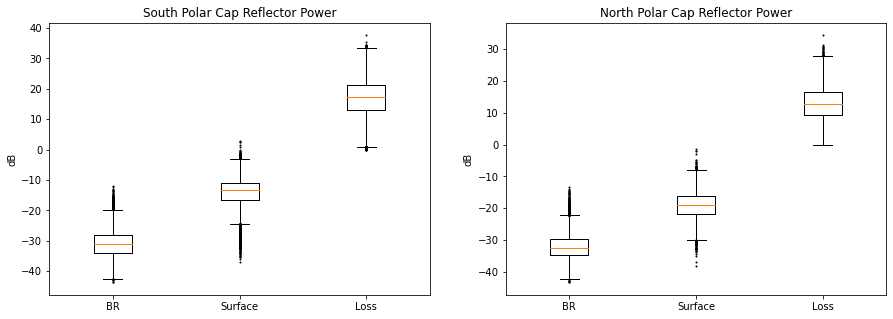

In [662]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5), sharex='col')

fp = dict(marker='o', markerfacecolor='k', markersize=2,linestyle='none', markeredgecolor='none')

ax1.boxplot([all_data_spld['br_power_db'],all_data_spld['surf_power_db'],
             all_data_spld['power_loss_db']],flierprops=fp);
ax1.set_ylabel("dB");
ax1.set_title("South Polar Cap Reflector Power");
ax1.set_xticklabels(['BR', 'Surface', 'Loss']);


ax2.boxplot([all_data_npld['br_power_db'],all_data_npld['surf_power_db'],
             all_data_npld['power_loss_db']],flierprops=fp);
ax2.set_ylabel("dB");
ax2.set_title("North Polar Cap Reflector Power");
ax2.set_xticklabels(['BR', 'Surface', 'Loss']);


Unsurprisingly, basal reflector powers appear to be lower than surface reflector powers at both locations. For the south pole, there are quite a few outliers on the higher end of the basal powers and the lower end of the surface powers. Measuring the power loss between these two outlier regions, one could expect situations where basal power exceeds the surface power, which would not be intuitive. There are a few reasons this can happen, one of which is fundamentally where the recent discussion regarding the proposed "subglacial water body" beneath the south polar cap comes from. However, that result comes from a different radar dataset, is quite a bit more involved, and not the focus of this project.

The south polar cap surface reflectors appear to have distinctly higher powers than those in the north, whereas the basal power distributions between both caps look very similar. This could be due to the south pole having more dust on its surface relative to the north. This would result in a higher dieletric contrast between the atmosphere and the surface, yielding a stronger reflection.

It seems there are some slight differences between the two caps in terms of power loss. Since this is at least partially tied to the degree of attenuation of the signal through the ice before it reaches the base, it's worth investigating the relationship between thickness and basal power.

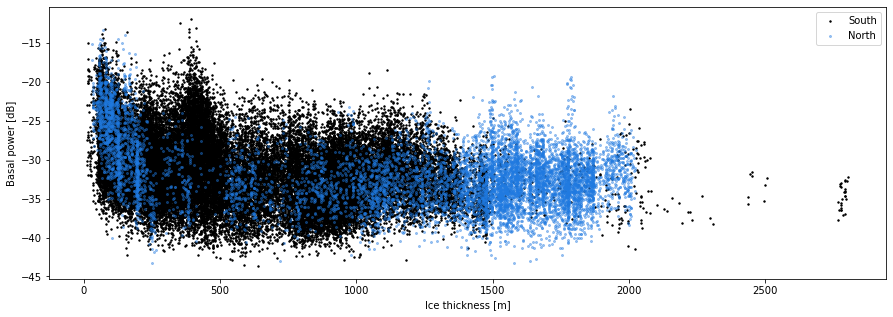

In [664]:
plt.scatter(all_data_spld["thickness"],all_data_spld["br_power_db"],c='black',s=2,label="South");
plt.scatter(all_data_npld["thickness"],all_data_npld["br_power_db"],c='#207ae0',s=4,alpha=0.4,label="North");
plt.xlabel("Ice thickness [m]");
plt.ylabel("Basal power [dB]");
plt.legend();

While the highest basal powers for both polar caps appear to be in the thinnest regions measured, it is hard to get a clear idea of a direct relationship between the two variables. Intuition says the signal would attenuate as it traverses through more ice, a negative relationship. **It is worth pursuing a quantitative correlation between these two variables to get a better idea of the difference in attenuation behavior between the two polar caps.**

We can look at both datasets individually with a point density plot to get an idea of where things are concentrated.

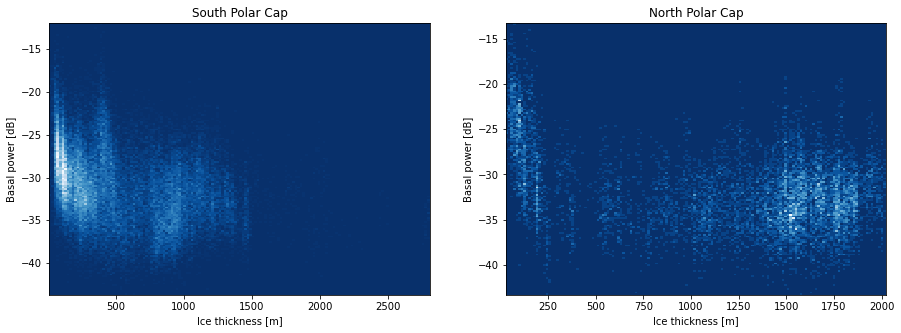

In [665]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5), sharex='col')
ax1.hist2d(all_data_spld["thickness"],all_data_spld["br_power_db"],bins=(150),cmap=plt.cm.Blues_r);
ax2.hist2d(all_data_npld["thickness"],all_data_npld["br_power_db"],bins=(150),cmap=plt.cm.Blues_r);

ax1.set_title('South Polar Cap')
ax1.set_ylabel('Basal power [dB]')
ax1.set_xlabel("Ice thickness [m]")
ax2.set_title('North Polar Cap')
ax2.set_ylabel('Basal power [dB]')
ax2.set_xlabel("Ice thickness [m]");

The south polar cap data is more concentrated in thinner regions of ice, even though the ice is known to reach thicknesses of around 3.7 km. The south polar cap has a larger areal extent, gradually thinning out in many places. The data suggests rapid attenuation to complete dissipation around 1.5 km. 

Though the north polar cap data are significantly fewer, they show the concentration of points both in its thinnest and thickest regions. The north polar cap's thickness is not so gradual over its full extent, with the majority of it being greater than 1 km before dropping off to its base at its perimeter where steep scarps are very common. The gap in the north polar data between thicknesses of 250 m and 1000 m is likely due to the large, widespread canyon-like troughs that cut through the ice. Radar sounding performs best on smooth, laterally horizontal surfaces, which might explain why the thickest parts measured at the north pole are near its interior, where these troughs are not as common.

Now I'll look at the regional distribution of the south polar cap data. I have labeled regions for each measurement that I can use to perform isolated analyses. This will help in determining whether or not a regional component is important to consider when describing the radar characteristics of the south polar cap.

In [666]:
all_data_spld.groupby(by='region').size()

region
AL     2538
AS    25998
PL     7124
SP     7292
UL     4666
dtype: int64

AS contains the most points in the dataset by a large margin.

/Users/nadim/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/boxplot.py:385: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


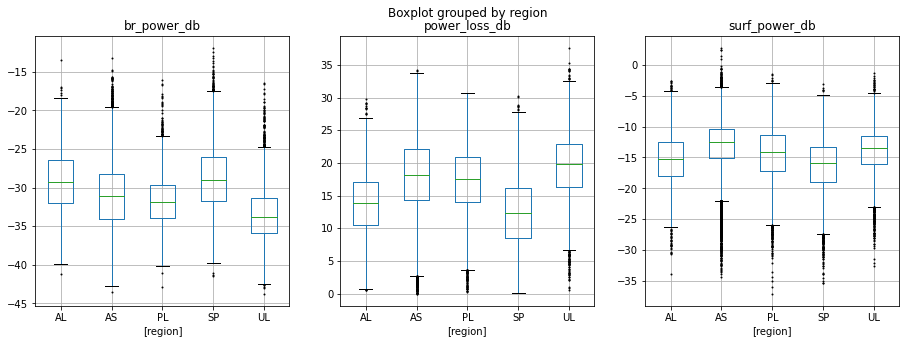

In [669]:
fig, axes = plt.subplots(1,3)
local = all_data_spld[['br_power_db','surf_power_db','power_loss_db','region']]
test = local.boxplot(
by="region",ax=axes,
showfliers=True,flierprops=fp);

/Users/nadim/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/boxplot.py:385: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


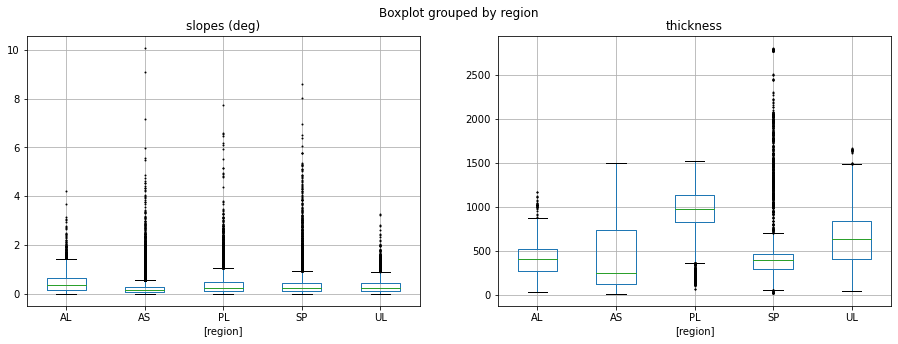

In [667]:
fig, axes = plt.subplots(1,2)
local = all_data_spld[['thickness','slopes (deg)','region']]
test = local.boxplot(
by="region",ax=axes,
showfliers=True,flierprops=fp);

In [668]:
all_data_spld.groupby(by='region')['thickness'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
AL,2538.0,414.651309,177.829231,25.354628,272.562247,405.674042,516.600538,1166.312872
AS,25998.0,416.180931,364.492715,12.677314,123.603810,244.038291,735.284202,1492.753702
PL,7124.0,957.751129,274.563930,60.217241,827.194727,976.153164,1137.788915,1514.939002
SP,7292.0,471.414138,379.298016,15.846642,294.747546,399.335385,459.552626,2804.855683
UL,4666.0,656.550231,318.998263,44.370598,402.504714,637.035020,836.702712,1667.066767


Basal reflector powers appear have skews towards higher values in all but AL. AL also contains relatively higher basal powers on average, only behind SP. SP contains some of the thinnest and thickest ice measured. Despite this fact, basal power remains relatively high across the entire region, suggesting attenuation from increasing ice thickness may not always be the case. 

UL has notably low basal power values, and the largest apparent power loss across all five regions. Though UL is by far the largest region in total area and is relatively thick on average, it is known for having rougher, scalloped terrain at the kilometer scale. This would act to clutter the radar signal, inhibiting a clearer detection of subsurface reflectors and ultimately lessening the amount of energy reaching the base.

The slope outliers greatly skew the data. However, these outliers may contain some important information when viewed in the context of surface and basal power. AL has the highest average slopes, but AS, PL, and SP have significantly higher slopes overall.

For thickness, only SP shows a dramatic skew, and this is because of where I defined this boundary. SP includes some of the thinnest and some of the thickest parts of the south polar cap, separated by a large scarp. The high-standing side of this scarp contains the highest elevations and thickest ice throughout the entire south polar cap, but so few data points exist here that I decided to include them into SP rather than define them as their own region. The transition between the high and low areas here are likely where some of the outlier high slopes are for SP. Outside of this, PL appears to contain the highest measured ice thicknesses, on average.

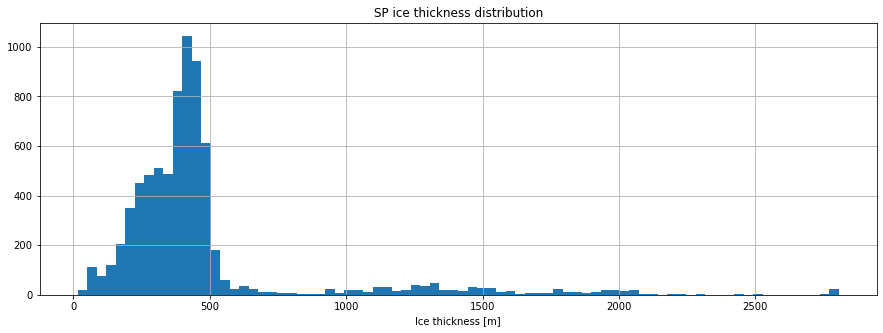

In [676]:
(all_data_spld[all_data_spld['region'] == 'SP']['thickness']).hist(bins=80)
plt.xlabel('Ice thickness [m]');
plt.title('SP ice thickness distribution');

Focusing in on slopes, I'll now see if the surface reflector power shows any relationship with some of the outliers I've seen so far.

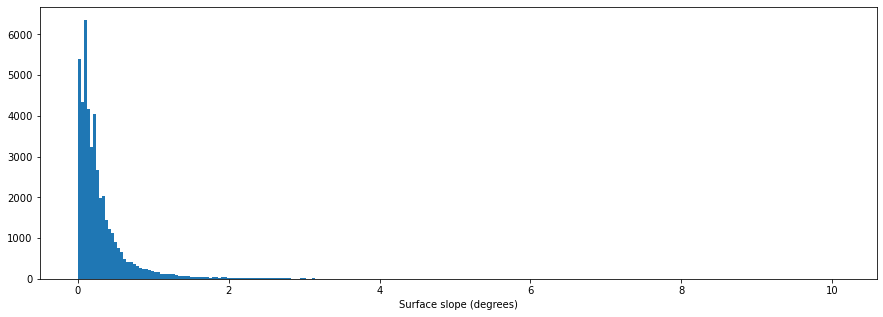

In [670]:
plt.hist(all_data_spld[all_data_spld['slopes (deg)'] > 0]['slopes (deg)'], bins=250);
plt.xlabel("Surface slope (degrees)");

Again, there is a significant right-skew to the slopes I calculated. Most surface slopes are under 1 degree. The south pole is very large, and over scales of hundreds of meters, very flat in most regions. The only place one would expect dramatic slopes is in trough regions, similar to the north polar cap. These features do exist at the south pole, however they are more common near the thickest ice, where it would already be difficult for the radar signal to reach the base. Again, radar sounding does not perform very well at getting energy through large, uneven surfaces. Therefore, it is likely that my best measurements are going to come from regions that are relatively flat, hence why the range of slopes is relatively small and the concentration of slope values being lower values. Can I use the few outliers that exist to look for any relationship between reflector power and slope?

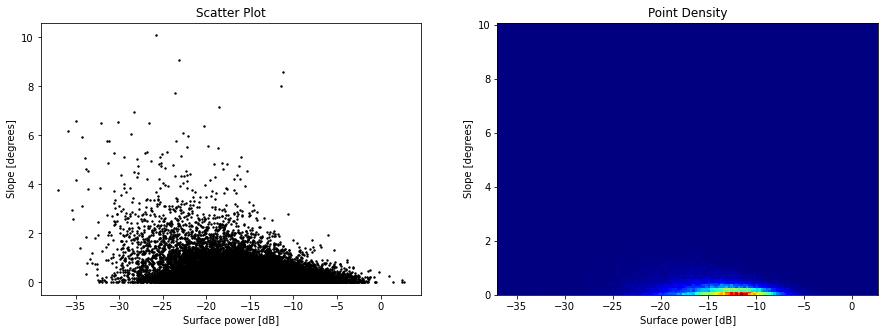

In [671]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(all_data_spld["surf_power_db"],all_data_spld["slopes (deg)"],c='black',s=2,label="South");
ax2.hist2d(all_data_spld["surf_power_db"],all_data_spld["slopes (deg)"],bins=(150),cmap='jet');

ax1.set_title('Scatter Plot')
ax1.set_ylabel('Slope [degrees]')
ax1.set_xlabel("Surface power [dB]")
ax2.set_title('Point Density')
ax2.set_ylabel('Slope [degrees]')
ax2.set_xlabel("Surface power [dB]");

The scatter plot on the left hints at some interesting behavior. As surface power decreases (going to the left of the plot), there's a larger range in surface slopes. As surface power increases, less surface slope variation occurs. If steeper surface slopes are reducing the measured power of the surface reflector, this could influence how power loss is calculated between the surface and the base. In other words, the loss of power between the surface and base will appear smaller if surface power itself is lower than expected (due to increased slope). I'll attempt to isolate this behavior, though **it is also worth calculating a statistical correlation between the two to have a quantitative measurement to report.** 

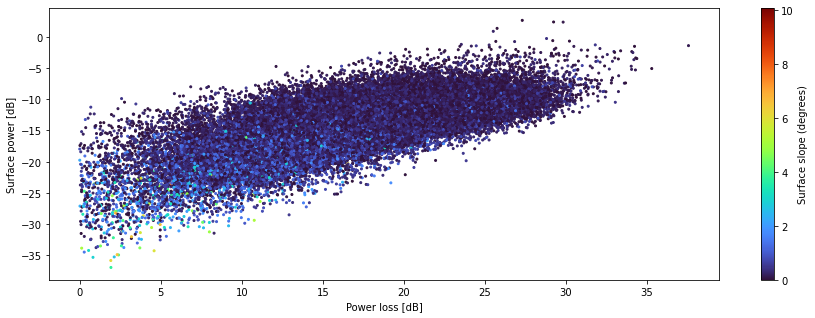

In [672]:
plt.scatter(all_data_spld["power_loss_db"],all_data_spld["surf_power_db"],
            c=all_data_spld['slopes (deg)'],cmap='turbo',s=4,label="South");
plt.xlabel("Power loss [dB]");
plt.ylabel("Surface power [dB]");
plt.colorbar(label='Surface slope (degrees)')

Viewing the relationship between surface power and calculated power loss in the context of surface slope yields a somewhat uniform pattern, though it is notable that the surface slopes start to increase near the origin. This would support the aforementioned idea what surface slope does in fact affect reflector power, and by extension, measures of power loss between the surface and the base.

# Model ideas for the data

1. To test if there a negative relationship between ice thickness and basal reflector power, I'll calculate the correlation for both north and south polar cap datasets. I'll also calculate this at a regional scale for the south polar dataset.

2. I'll calculate the correlation between surface slope and surface reflector power to determine if it is statistically significant. This will likely involve subsetting the data to unskew the surface slope distribution in order to make sure of the entire range of slopes.

3. I am considering doing a separate analysis that splits SP into two regions. Any new insights from doing this will influence further modeling ideas.